<h1>Brain Tumor Detection</h1>




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, shutil
import cv2
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
import shutil

folder_path = "/tumorous_and_non_tumorous"

try:
    shutil.rmtree(folder_path)  # Removes the folder and all its contents
    print(f"Folder '{folder_path}' and its contents have been deleted.")
except FileNotFoundError:
    print(f"The folder '{folder_path}' does not exist.")
except PermissionError:
    print(f"Permission denied to delete the folder '{folder_path}'.")


Folder '/content/tumorous_and_non_tumorous' and its contents have been deleted.


In [3]:
import zipfile

z = zipfile.ZipFile('archive.zip')

z.extractall()

In [4]:
folder = 'brain_tumor_dataset/'
yes_files = 'brain_tumor_dataset/yes/'
no_files = 'brain_tumor_dataset/no/'

no_of_yes = len(os.listdir(yes_files))
no_of_no = len(os.listdir(no_files))

print(no_of_yes)
print(no_of_no)


155
98


### Rename all the files

In [5]:
count = 1
for filename in os.listdir(yes_files):
  source = yes_files + filename
  dest = yes_files + 'Y_' + str(count) + '.jpg'
  os.rename(source, dest)
  count += 1

print("All Yes files are renamed")


All Yes files are renamed


In [6]:
count = 1
for filename in os.listdir(no_files):
  source = no_files + filename
  dest = no_files + 'N_' + str(count) + '.jpg'
  os.rename(source, dest)
  count += 1

print("All No files are renamed")


All No files are renamed


## Exploratory Data Analysis

Non Tumorous data is 38.73517786561265% 
Tumorous data is 61.26482213438735% 


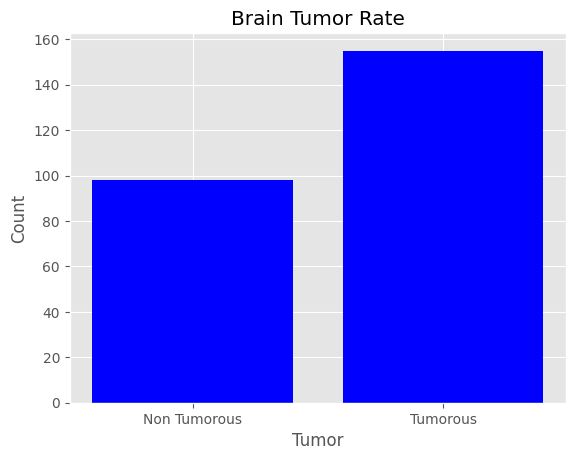

In [7]:
data = {'Non Tumorous': no_of_no, 'Tumorous': no_of_yes}
print(f"Non Tumorous data is {(no_of_no/(no_of_no+no_of_yes))*100}% ")
print(f"Tumorous data is {(no_of_yes/(no_of_no+no_of_yes))*100}% ")
plt.bar(data.keys(), data.values(),color='blue')
plt.xlabel('Tumor')
plt.ylabel('Count')
plt.title('Brain Tumor Rate')
plt.show()


#### There is an imbalance in the data so we are performing data augmentation to generate more data to balance.

### Data Augmentation

In [8]:
import os

# Define the main folder and subfolder names
main_folder = "augmented"
subfolders = ["yes", "no"]

# Check if the main folder exists; if not, create it
if not os.path.exists(main_folder):
    os.makedirs(main_folder)
    print(f"Folder '{main_folder}' created.")

# Check and create subfolders inside the main folder
for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)
    if not os.path.exists(subfolder_path):
        os.makedirs(subfolder_path)
        print(f"Subfolder '{subfolder}' created inside '{main_folder}'.")
    else:
        print(f"Subfolder '{subfolder}' already exists inside '{main_folder}'.")


Folder 'augmented' created.
Subfolder 'yes' created inside 'augmented'.
Subfolder 'no' created inside 'augmented'.


In [9]:
def augmented_data(main_path,n_samples,save_path):
  data_gen = keras.preprocessing.image.ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      fill_mode='nearest',
      horizontal_flip=True,
      vertical_flip=True
  )
  for filename in os.listdir(main_path):

    img = cv2.imread(main_path+filename)
    img = img.reshape((1,)+img.shape)
    save_prefix = 'aug' + filename[:-4]
    i = 0
    for batch in data_gen.flow(
        x = img, batch_size = 1,save_to_dir = save_path,
        save_prefix = save_prefix,save_format = 'jpg'
    ):
      i += 1
      if i > n_samples:
        break

import time
augmented_data_path = 'augmented/'

start = time.time()

augmented_data(yes_files,6,augmented_data_path+"yes")
augmented_data(no_files,9,augmented_data_path+"no")


end = time.time()

print(f"Total time is {end-start}")




Total time is 79.6591808795929


Non Tumorous data is 47.478176527643065% 
Tumorous data is 52.521823472356935% 


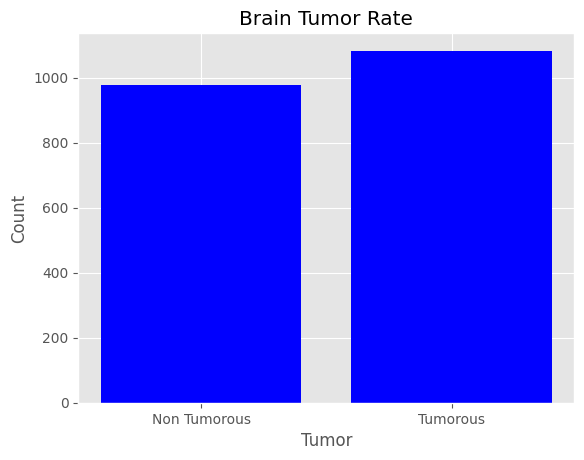

In [10]:
no_of__aug_no = len(os.listdir(augmented_data_path+'/no/'))
no_of__aug_yes = len(os.listdir(augmented_data_path+'/yes/'))
data = {'Non Tumorous': no_of__aug_no, 'Tumorous': no_of__aug_yes}
print(f"Non Tumorous data is {(no_of__aug_no/(no_of__aug_no+no_of__aug_yes))*100}% ")
print(f"Tumorous data is {(no_of__aug_yes/(no_of__aug_no+no_of__aug_yes))*100}% ")
plt.bar(data.keys(), data.values(),color='blue')
plt.xlabel('Tumor')
plt.ylabel('Count')
plt.title('Brain Tumor Rate')
plt.show()


#### As you see that the data is balanced now. Tumorous data is 52% and and Non Tumorous data is 48%

In [11]:
listyes = os.listdir("augmented/yes")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("augmented/no")
number_files_no = len(listno)
print(number_files_no)

1083
979


### Cropping Images for better result

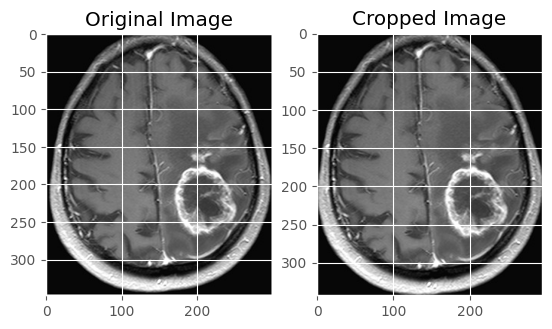

array([[[135, 135, 135],
        [135, 135, 135],
        [137, 137, 137],
        ...,
        [137, 137, 137],
        [134, 134, 134],
        [127, 127, 127]],

       [[  3,   3,   3],
        [  2,   2,   2],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  2,   2,   2]],

       [[  4,   4,   4],
        [  6,   6,   6],
        [  2,   2,   2],
        ...,
        [  8,   8,   8],
        [  9,   9,   9],
        [  0,   0,   0]],

       ...,

       [[  8,   8,   8],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  0,   0,   0]],

       [[  8,   8,   8],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  0,   0,   0]],

       [[  8,   8,   8],
        [  7,   7,   7],
        [  7,   7,   7],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  0,   0,   0]]], dtype=uint8)
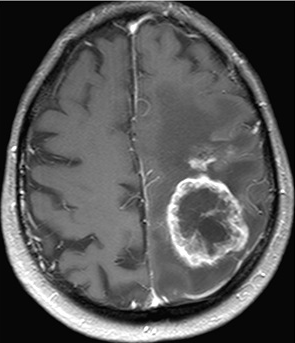

In [12]:
import imutils

def crop_brain_tumor(image, plot = False):
  image = cv2.imread(image)
  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #changing into gray scale
  gray = cv2.GaussianBlur(gray,(5,5),0) #makes the image smooth
  thres = cv2.threshold(gray,thresh=45,maxval=255,type = cv2.THRESH_BINARY)[1] # converting the image into binary (0,1), less than 45 makes the pixel 0 above 45 make it 1
  thres = cv2.erode(thres, None, iterations = 2) #Shrinks white regions by removing small irregularities
  thres = cv2.dilate(thres,None,iterations=2) #Expands the white region to fill gaps

  cnts = cv2.findContours(thres.copy(),mode = cv2.RETR_EXTERNAL,method = cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  c = max(cnts, key=cv2.contourArea)

  extleft = tuple(c[c[:,:,0].argmin()][0])
  extright = tuple(c[c[:,:,0].argmax()][0])
  exttop = tuple(c[c[:,:,1].argmin()][0])
  extbottom = tuple(c[c[:,:,1].argmax()][0])
  new_image = image [exttop[1]:extbottom[1], extleft[0]:extright[0]]
  if plot:
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.tick_params(axis='both', which='both')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(new_image)
    plt.tick_params(axis='both', which='both')
    plt.title('Cropped Image')
    plt.show()

  return new_image

crop_brain_tumor('/content/brain_tumor_dataset/yes/Y_10.jpg',True)

In [13]:
folder1 = augmented_data_path + 'yes/'
folder2 = augmented_data_path + 'no/'

for filename in os.listdir(folder1):
  img_path = folder1 + filename
  img = crop_brain_tumor(img_path)
  cv2.imwrite(folder1+filename , img)

for filename in os.listdir(folder2):
  img_path = folder2+filename
  img = crop_brain_tumor(img_path)
  cv2.imwrite(folder2+filename , img)


In [14]:
import os

# Define the root directory
root_dir = 'tumorous_and_non_tumorous'

# Create the root directory if it doesn't exist
if not os.path.exists(root_dir):
    os.makedirs(root_dir)

# Define the subdirectories
subdirectories = [
    ('train', ['tumorous', 'nontumorous']),
    ('test', ['tumorous', 'nontumorous']),
    ('valid', ['tumorous', 'nontumorous'])
]

# Create the subdirectories
for dir_name, subdirs in subdirectories:
    dir_path = os.path.join(root_dir, dir_name)
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    for subdir in subdirs:
        subdir_path = os.path.join(dir_path, subdir)
        if not os.path.exists(subdir_path):
            os.makedirs(subdir_path)

print("Folder structure created successfully!")

Folder structure created successfully!


### Loading the data and making X,y

In [15]:
from sklearn.utils import shuffle

def load_data(dir_list, img_size):
  X = []
  y = []
  img_width , img_height = img_size
  for directory in dir_list:
    for filename in os.listdir(directory):
      img_path = directory +'/'+ filename
      img = crop_brain_tumor(img_path)
      img = cv2.resize(img,dsize=(img_width,img_height),interpolation = cv2.INTER_CUBIC)
      img = img /255.00
      X.append(img)
      if directory[-3:] == 'yes':
        y.append(1)
      else:
        y.append(0)
  X = np.array(X)
  y = np.array(y)
  X,y = shuffle(X,y)

  print(f"Number of example is : {len(X)}")
  print(f"X SHAPE is : {X.shape}")
  print(f"y SHAPE is : {y.shape}")
  return X,y

In [16]:
augmented_path = 'augmented/'
augmented_yes = augmented_path + 'yes'
augmented_no = augmented_path + 'no'

In [17]:
(IMAGE_WIDTH,IMAGE_HEIGHT) = (240,240)

X,y = load_data([augmented_no,augmented_yes],(IMAGE_WIDTH,IMAGE_HEIGHT))

Number of example is : 2062
X SHAPE is : (2062, 240, 240, 3)
y SHAPE is : (2062,)


### Train Test Split

In [18]:
original_tumorous = os.path.join('augmented','yes/')
original_nontumorous = os.path.join('augmented','no/')
infected_train = 'tumorous_and_non_tumorous/train/tumorous'
infected_test = 'tumorous_and_non_tumorous/test/tumorous'
infected_valid = 'tumorous_and_non_tumorous/valid/tumorous'
non_infected_train = 'tumorous_and_non_tumorous/train/nontumorous'
non_infected_test = 'tumorous_and_non_tumorous/test/nontumorous'
non_infected_valid = 'tumorous_and_non_tumorous/valid/nontumorous'

### Spliting infected data

In [19]:
fnames = []
files = os.listdir('augmented/yes/')
for i in range(0,759):
  fnames.append(files[i])
for fname in fnames:
  src = os.path.join(original_tumorous,fname)
  dst = os.path.join(infected_train,fname)
  shutil.copyfile(src,dst)


In [20]:
fnames = []
for i in range(759,922):
  fnames.append(files[i])
for fname in fnames:
  src = os.path.join(original_tumorous,fname)
  dst = os.path.join(infected_test,fname)
  shutil.copyfile(src,dst)

In [21]:
fnames = []
for i in range(922,number_files_yes):
  fnames.append(files[i])
for fname in fnames:
  src = os.path.join(original_tumorous,fname)
  dst = os.path.join(infected_valid,fname)
  shutil.copyfile(src,dst)

### Spliting non-infected data

In [22]:
fnames = []
files = os.listdir('augmented/no/')
for i in range(0,686):
  fnames.append(files[i])
for fname in fnames:
  src = os.path.join(original_nontumorous,fname)
  dst = os.path.join(non_infected_train,fname)
  shutil.copyfile(src,dst)



In [23]:

fnames = []
for i in range(686,833):
  fnames.append(files[i])
for fname in fnames:
  src = os.path.join(original_nontumorous,fname)
  dst = os.path.join(non_infected_test,fname)
  shutil.copyfile(src,dst)

In [24]:
fnames = []
for i in range(833,number_files_no):
  fnames.append(files[i])
for fname in fnames:
  src = os.path.join(original_nontumorous,fname)
  dst = os.path.join(non_infected_valid,fname)
  shutil.copyfile(src,dst)

### Model Building

In [25]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    rescale = 1.0/255,
    horizontal_flip=0.4,
    vertical_flip=0.4,
    fill_mode='nearest',
    shear_range=40

)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
valid_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

In [26]:
train_generator = train_datagen.flow_from_directory(
    'tumorous_and_non_tumorous/train',
    target_size=(240,240),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed = 42
)



Found 1445 images belonging to 2 classes.


In [27]:
test_generator = test_datagen.flow_from_directory(
    'tumorous_and_non_tumorous/test',
    target_size=(240,240),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed = 42
)

Found 310 images belonging to 2 classes.


In [28]:
valid_generator = valid_datagen.flow_from_directory(
    'tumorous_and_non_tumorous/valid',
    target_size=(240,240),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed = 42
)

Found 307 images belonging to 2 classes.


In [29]:
class_labels = train_generator.class_indices

class_name = {value:key for (key,value) in class_labels.items() }

class_name

{0: 'nontumorous', 1: 'tumorous'}

In [30]:

import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(240, 240, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax')) # 2 classes: tumorous and nontumorous

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 34s 553ms/step - acc: 0.5453 - loss: 0.6879 - val_acc: 0.4792 - val_loss: 0.6900
Epoch 2/50
 1/45 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - acc: 0.4688 - loss: 0.7024

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.4688 - loss: 0.7024 - val_acc: 0.4896 - val_loss: 0.6885
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 918ms/step - acc: 0.5451 - loss: 0.6873 - val_acc: 0.5694 - val_loss: 0.6746
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.7188 - loss: 0.6643 - val_acc: 0.6285 - val_loss: 0.6734
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 82s 935ms/step - acc: 0.5962 - loss: 0.6709 - val_acc: 0.7326 - val_loss: 0.6274
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.7812 - loss: 0.6295 - val_acc: 0.5069 - val_loss: 0.6547
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 82s 944ms/step - acc: 0.6448 - loss: 0.6267 - val_acc: 0.6701 - val_loss: 0.5883
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.7812 - loss: 0.5231 - val_acc: 0.7222 - val_loss: 0.5753
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 82s 958ms/step - acc: 0.7266 - loss: 0.5621 - val_acc: 0.7083 - val_loss: 0.5863
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.6875 -

<Figure size 640x480 with 0 Axes>

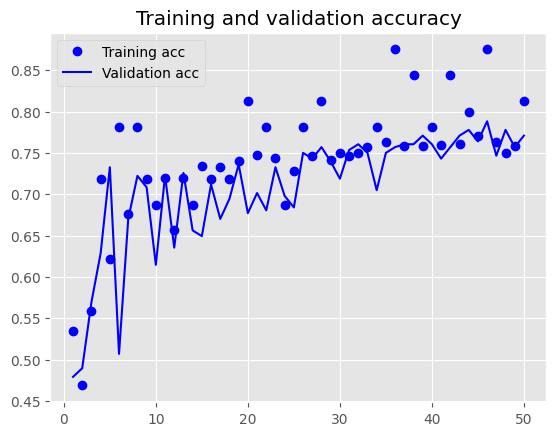

<Figure size 640x480 with 0 Axes>

In [34]:


import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()



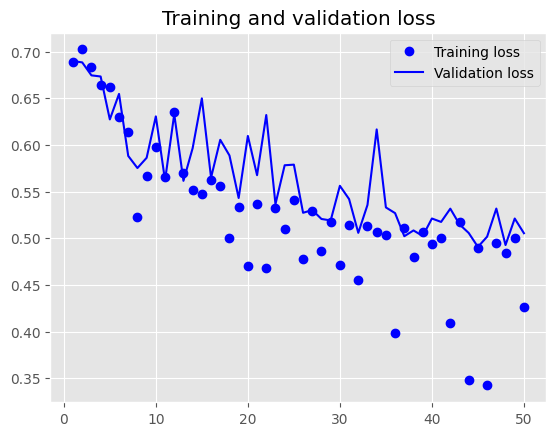

In [33]:

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step
Image: /content/brain_tumor_dataset/yes/Y_110.jpg
Prediction: tumorous with confidence 0.9268


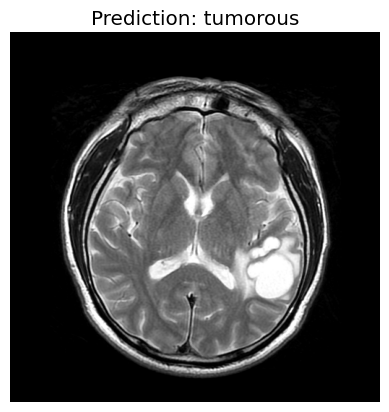

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image: /content/brain_tumor_dataset/no/N_75.jpg
Prediction: nontumorous with confidence 0.9519


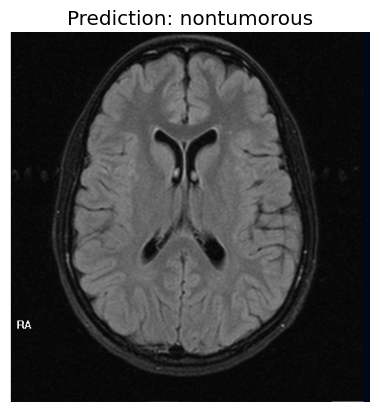

In [31]:

import matplotlib.pyplot as plt
import numpy as np
def make_prediction(model, image_path, img_size):
  """
  Makes a prediction on a single image using the trained model.

  Args:
    model: The trained Keras model.
    image_path: The path to the image file.
    img_size: A tuple (width, height) representing the target image size.

  Returns:
    A dictionary containing the predicted class and confidence scores.
  """
  img = crop_brain_tumor(image_path)
  img = cv2.resize(img, dsize=img_size, interpolation=cv2.INTER_CUBIC)
  img = img / 255.00
  img = np.expand_dims(img, axis=0)  # Add batch dimension

  predictions = model.predict(img)
  predicted_class_index = np.argmax(predictions)
  predicted_class_name = class_name[predicted_class_index]
  confidence = predictions[0][predicted_class_index]

  return {'predicted_class': predicted_class_name, 'confidence': confidence}

# Example usage: Test the model with a few images
test_image_paths = [
    '/content/brain_tumor_dataset/yes/Y_110.jpg', # Example tumorous image
    '/content/brain_tumor_dataset/no/N_75.jpg'   # Example non-tumorous image
]

for img_path in test_image_paths:
  prediction_result = make_prediction(model, img_path, (IMAGE_WIDTH, IMAGE_HEIGHT))
  print(f"Image: {img_path}")
  print(f"Prediction: {prediction_result['predicted_class']} with confidence {prediction_result['confidence']:.4f}")
  # Display the image
  img_display = cv2.imread(img_path)
  plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
  plt.title(f"Prediction: {prediction_result['predicted_class']}")
  plt.axis('off')
  plt.show()